In [1]:
import pandas as pd
import altair as alt

In [2]:
ftp_url = 'https://dmws.hkvservices.nl/dataportal/data.asmx/read2?database=dmshoutribdijk&key=csv_ftp_standard_data&contentType=text/plain'
std_url = 'https://dmws.hkvservices.nl/dataportal/data.asmx/read2?database=dmshoutribdijk&key=csv_thredds_standard_data&contentType=text/plain'
tld_url = 'https://dmws.hkvservices.nl/dataportal/data.asmx/read2?database=dmshoutribdijk&key=csv_thredds_tailored_data&contentType=text/plain'

In [3]:
df_ftp = pd.read_csv(ftp_url,index_col=0)
df_ftp = df_ftp.assign(Origin='ftp')

df_std = pd.read_csv(std_url,index_col=0)
df_std = df_std.assign(Origin='standard')

df_tld = pd.read_csv(tld_url,index_col=0)
df_tld = df_tld.assign(Origin='tailored')

In [4]:
df = pd.concat([df_std, df_tld, df_ftp], axis=0, sort=True)

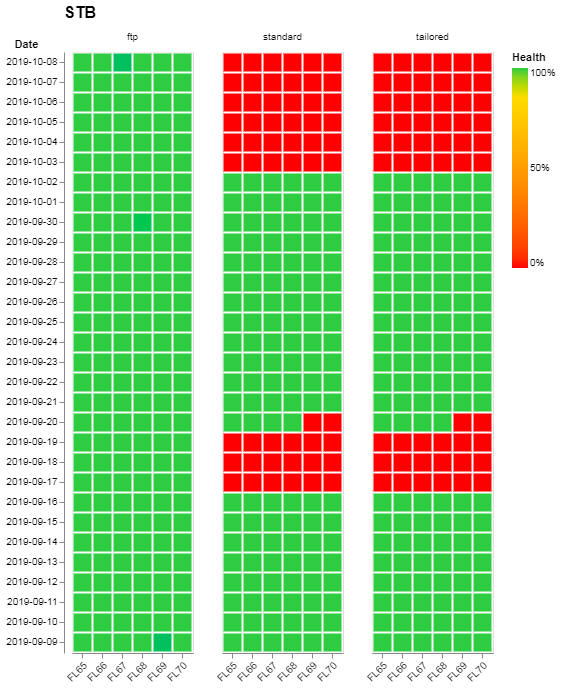

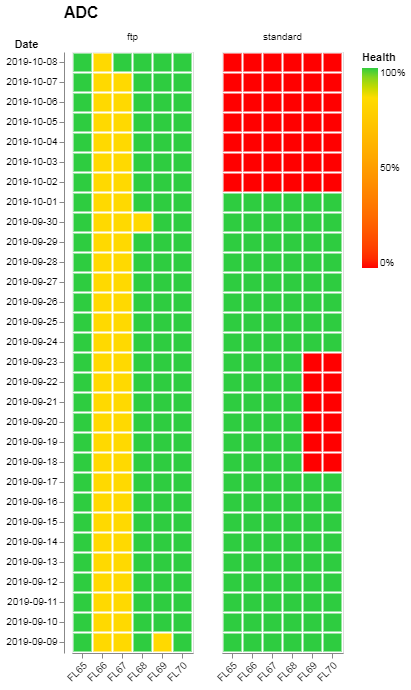

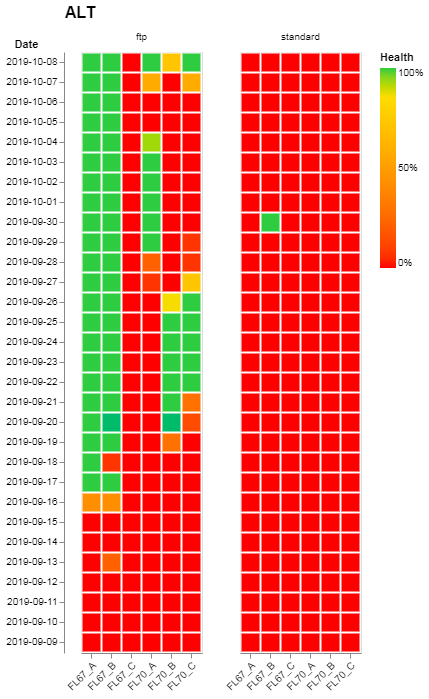

In [ ]:
for s in df.Sensor.unique():
    df_sensor = df[df.Sensor == s]
    
    single_nearest = alt.selection_single(on='mouseover', empty='none')

    chart = alt.Chart(df_sensor).mark_rect().encode(
        y=alt.Y('Date:N', sort='descending'),
        x=alt.X('Locatie:N', title=None),
        fill=alt.Fill('Files received:Q', scale=alt.Scale(domain=[0, .85,
                      1.00], range=['red', '#FFDC00', '#2ECC40']),
                      legend=alt.Legend(values=[0, 0.50, 1], title='Health'
                      , format='.0%')),
        stroke=alt.condition(single_nearest, alt.StrokeValue('black'),
                             alt.StrokeValue('white')),
        tooltip=[
            'Locatie:N',
            'Sensor:N',
            'Expected files:Q',
            'Date:N',
            alt.Tooltip('Files received:Q', format='.0%'),
            alt.Tooltip('Valid files:Q', format='.0%'),
            ],
        facet=alt.Facet('Origin:N', title=s),
        ).resolve_scale(x='independent'
                        ).configure_scale(bandPaddingInner=0.05,
                bandPaddingOuter=0.05).configure_axisX(labelAngle=-45).configure_axisY(titleAngle=0,
                titleAlign='left', titleY=-3,
                titleX=-50).configure_header(titleFontSize=16,
                titleAnchor='start').add_selection(single_nearest)    
    chart.display()